In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression/student_depression_dataset.csv


In [3]:
data = pd.read_csv("/kaggle/input/depression/student_depression_dataset.csv")
print(data.head())
df_copy = data.copy()

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
data['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [6]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
data['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

# Cleaning the Data

## Converting column 'Sleep Duration' to only numerical values.

In [8]:
## Converting column 'Sleep Duration' to only numerical values.

data['Sleep Duration'] = data['Sleep Duration'].str.strip("'").str.strip()


sleep_map = {
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9,
    "Others": 5  # 5 beacause majorty of the values are 4 and less than that is 5.5
}

data['Sleep Duration (hours)'] = data['Sleep Duration'].map(sleep_map)



In [9]:
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [10]:
data['Sleep Duration (hours)'].unique()
# Done

array([5.5, 4. , 7.5, 9. , 5. ])

## Change 'Yes' and 'No' columns to 1 and 0

In [11]:
data['Family History of Mental Illness'].unique() # confirming the values in the column. 

array(['No', 'Yes'], dtype=object)

In [12]:
data['Have you ever had suicidal thoughts ?'].unique() # confirming the values column.

array(['Yes', 'No'], dtype=object)

In [13]:
yes_no_map = {"Yes":1, "No":0}

data['Suicidal Thoughts'] = data["Have you ever had suicidal thoughts ?"].map(yes_no_map)
data['Family History'] = data["Family History of Mental Illness"].map(yes_no_map)

In [14]:
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  ...  \
0            0.0  8.97                 2.0               0.0  ...   
1            0.0  5.90                 5.0               0.0  ...   
2            0.0  7.03                 5.0               0.0  ...   
3            0.0  5.59                 2.0               0.0  ...   
4            0.0  8.13                 3.0               0.0  ...   

  Dietary Habits   Degree Have you ever had suicidal thoughts ?  \
0        Healthy  B.Pharm                                   Yes   
1       Moderate      BSc                 

## Exploring and cleaning "Dietary Habits column"

In [15]:
data['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [16]:
data['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [17]:
diet_map = {
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2,
    'Others': 0  # 0 because Majority of the sudents had unhealthy habits
}

data['Dietary Score'] = data['Dietary Habits'].map(diet_map)


In [18]:
print(data.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  ...   Degree  \
0            0.0  8.97                 2.0               0.0  ...  B.Pharm   
1            0.0  5.90                 5.0               0.0  ...      BSc   
2            0.0  7.03                 5.0               0.0  ...       BA   
3            0.0  5.59                 2.0               0.0  ...      BCA   
4            0.0  8.13                 3.0               0.0  ...   M.Tech   

  Have you ever had suicidal thoughts ? Work/Study Hours Financial Stress  \
0                                   Yes      

### Done cleaning.

# Exploring the Data

In [19]:




# # ✅ Optional, but improves Seaborn plot styling
# sns.set(style="whitegrid")


## Q1) Distribution of Depression Cases

In [35]:
print(data['Depression'].unique())
print(data['Depression'].value_counts())
print(data['Depression'].dtype)


[1 0]
Depression
1    16336
0    11565
Name: count, dtype: int64
int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



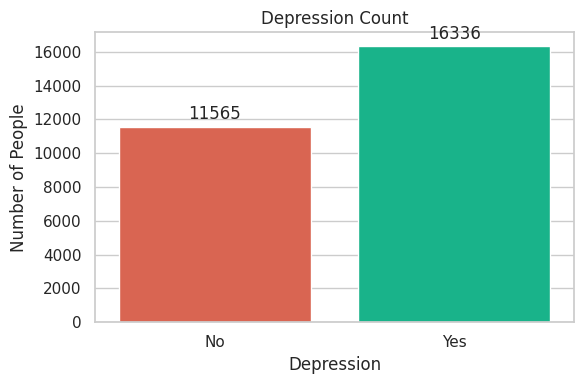

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Prepare data
depression_counts = data['Depression'].value_counts().sort_index()
depression_labels = ['No', 'Yes']

# Convert depression_counts to a pandas Series (if not already)
depression_counts = pd.Series(depression_counts)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=depression_labels, y=depression_counts.values, palette=["#EF553B", "#00CC96"])

# Add labels
plt.title("Depression Count")
plt.xlabel("Depression")
plt.ylabel("Number of People")
for i, count in enumerate(depression_counts.values):
    plt.text(i, count + 200, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Conclusion:
We can see that 16,336 students are depressed out of 27901 students. which means 58.54% Student are depressed out of 100%. This is very shocking as majority of the students are depressed in India which is the direct reflection of the short-comings of the Indian education education system and environment.

In [42]:
x=(16336/27901)*100
x

58.549872764417046

## Q2) Depression by Gender

In [22]:
fig = px.histogram(
    data,
    x="Gender",
    color="Depression",
    barmode="group",
    title="Depression Distribution by Gender",
    labels={"Gender": "Gender", "Depression": "Depression Status"}
)
fig.show()


In [23]:
data['Gender'].value_counts()

Gender
Male      15547
Female    12354
Name: count, dtype: int64

In [24]:
male_perc = (9115/15547)*100
female_per = (7221/12345)*100
print(male_perc,female_per)

58.62867434231684 58.49331713244228


Conclusion: There is no noticeable gap between percentage the male and female students who are in depression. This also suggests that the male and female population are affected equally by depression.

## Q3) CGPA vs Depression

In [25]:
import plotly.express as px

fig = px.box(data, x='Depression', y='CGPA', color='Depression',
             title='CGPA vs Depression')
fig.update_layout(xaxis_title='Depression', yaxis_title='CGPA')
fig.show()



In [26]:
# Calculate the Pearson correlation between CGPA and Depression
correlation = data['CGPA'].corr(data['Depression'])
print(f"Pearson Correlation between CGPA and Depression: {correlation}")


Pearson Correlation between CGPA and Depression: 0.022210470344461636


Conclusion: Based on this visualization alone, there doesn't appear to be a strong correlation between CGPA and depression status in this student population. Students with depression seem to achieve similar academic performance as measured by CGPA compared to students without depression.

## Q4) Academic & Work Pressure vs Depression

In [43]:
print(data['Academic Pressure'].unique())
print(data['Work Pressure'].unique())


[5. 2. 3. 4. 1. 0.]
[0. 5. 2.]


In [47]:
print(data[['Academic Pressure','Work Pressure']])

       Academic Pressure  Work Pressure
0                    5.0            0.0
1                    2.0            0.0
2                    3.0            0.0
3                    3.0            0.0
4                    4.0            0.0
...                  ...            ...
27896                5.0            0.0
27897                2.0            0.0
27898                3.0            0.0
27899                5.0            0.0
27900                4.0            0.0

[27901 rows x 2 columns]


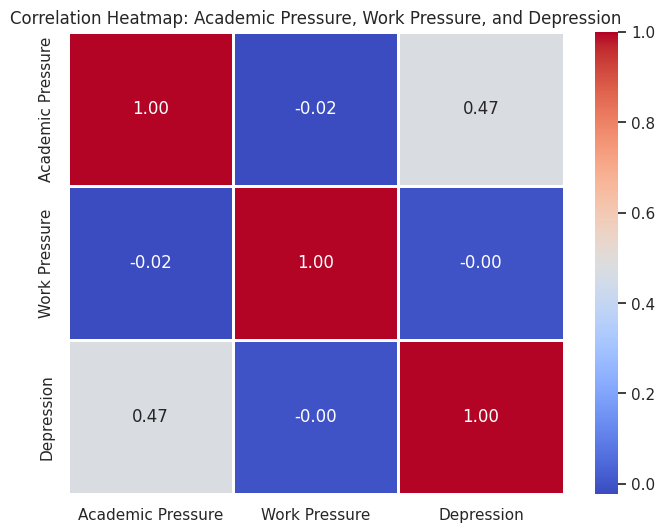

In [50]:
# Correlation matrix
corr_matrix = data[['Academic Pressure', 'Work Pressure', 'Depression']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Correlation Heatmap: Academic Pressure, Work Pressure, and Depression")
plt.show()
